In [2]:
import pandas as pd
import matplotlib.pyplot as plt

ay = pd.read_csv('hf://datasets/lukebarousse/data_jobs/data_jobs.csv')

ay['job_posted_date'] = pd.to_datetime (ay['job_posted_date'])

c:\Users\EMMANUEL\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
ay_us = ay[ay['job_country']=='United States'].copy()
ay_us['job_posted_month']= ay_us['job_posted_date'].dt.strftime('%B')

ay_us['job_posted_month']

0             June
3             July
5         November
6            March
9            April
            ...   
785673     October
785685        July
785692       April
785703     January
785705     January
Name: job_posted_month, Length: 206292, dtype: object

In [4]:
ay_us_pivot=ay_us.pivot_table(index='job_posted_month',columns='job_title_short',aggfunc='size')
ay_us_pivot.reset_index (inplace=True)
ay_us_pivot['month no.']= pd.to_datetime(ay_us_pivot['job_posted_month'],format="%B").dt.month

ay_us_pivot.sort_values('month no.',inplace=True)
ay_us_pivot.set_index('job_posted_month',inplace=True)
ay_us_pivot.drop(columns='month no.',inplace=True)

ay_us_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [5]:
ay_us_software_pivot= pd.read_csv ("https://lukeb.co/software_csv", index_col='job_posted_month')

ay_us_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [1]:
ay_us_merge = ay_us_pivot.merge(ay_us_software_pivot, on='job_posted_month')

ay_us_merge

NameError: name 'ay_us_pivot' is not defined

In [7]:
top_5= (ay_us_merge
        .sum().
        sort_values(ascending=False)
        .head()
        .index
        .to_list()
)
top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

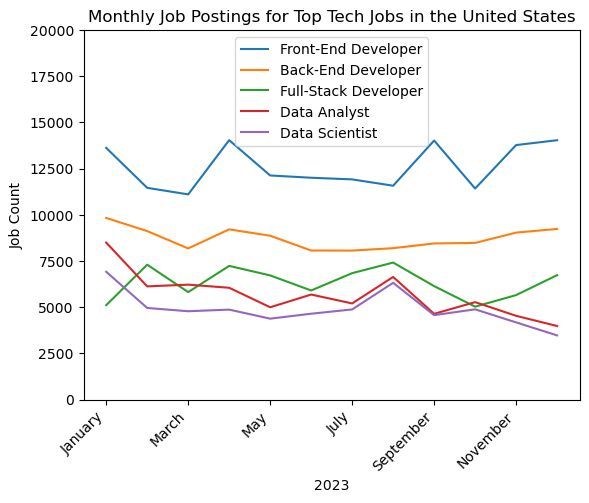

In [8]:
ay_us_merge[top_5].plot(kind='line')
plt.ylabel ('Job Count')
plt.ylim(0,20000)
plt.xlabel ('2023')
plt.title ('Monthly Job Postings for Top Tech Jobs in the United States')
plt.legend ()
plt.xticks (rotation = 45, ha = 'right')
plt.show ()

In [9]:
ay['job_posted_month']= ay['job_posted_date'].dt.strftime('%b')
ay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [10]:
months= ay['job_posted_month'].unique()

dict_months = {month: ay[ay['job_posted_month'] == month] for month in months}

dict_months['Jan']

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
20,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,NaN,NaN,NaN,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'sci...","{'libraries': ['pandas', 'numpy', 'scikit-lear...",Jan
39,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,NaN,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",Jan
53,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,NaN,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",Jan
55,Data Scientist,Data Scientist,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-03 23:02:27,False,False,Brazil,NaN,NaN,NaN,Mars,"['python', 'sql', 'azure']","{'cloud': ['azure'], 'programming': ['python',...",Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785699,Software Engineer,Simulation Engineer,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-16 06:35:30,False,False,Czechia,NaN,NaN,NaN,Ricardo Prague s.r.o.,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",Jan
785700,Data Engineer,Data Engineer Ssr/Sr,"Mexico City, CDMX, Mexico",via Trabajo.org,Full-time,False,Mexico,2023-01-12 06:19:55,True,False,Mexico,NaN,NaN,NaN,Tsoft,"['python', 'r', 'azure', 'aws', 'gcp', 'spark'...","{'cloud': ['azure', 'aws', 'gcp'], 'libraries'...",Jan
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,NaN,NaN,NaN,Axelon Services Corporation,NaN,NaN,Jan
785704,Business Analyst,Business Analyst,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-16 06:35:20,False,False,Czechia,NaN,NaN,NaN,Cleverlance,NaN,NaN,Jan


In [11]:
ay_q1 = pd.concat([dict_months['Jan'], dict_months['Feb'], dict_months['Mar']],ignore_index=True)

In [12]:
ay_q1['job_posted_month'].value_counts()

job_posted_month
Jan    91822
Feb    64578
Mar    64084
Name: count, dtype: int64

<Axes: xlabel='job_posted_month'>

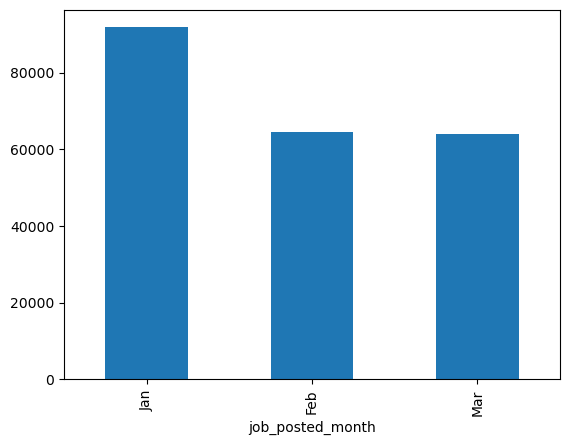

In [13]:
ay_q1['job_posted_month'].value_counts().plot(kind='bar')

In [14]:
ay_q1.head().to_clipboard(sep=',')

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,,,,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 'tableau']","{'analyst_tools': ['power bi', 'tableau'], 'programming': ['r', 'python', 'sql', 'nosql']}",Jan
1,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,,,,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'scikit-learn', 'matplotlib', 'hadoop', 'spark']","{'libraries': ['pandas', 'numpy', 'scikit-learn', 'matplotlib', 'hadoop', 'spark'], 'programming': ['r', 'python', 'sql']}",Jan
2,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,,,,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",Jan
3,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,,,,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws'], 'programming': ['sql', 'python']}",Jan
4,Data Scientist,Data Scientist,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-03 23:02:27,False,False,Brazil,,,,Mars,"['python', 'sql', 'azure']","{'cloud': ['azure'], 'programming': ['python', 'sql']}",Jan


In [15]:
#to create csv file
#ay_q1.to_csv('quarter_1.csv')

#to read/open the csv file,
#import pandas as azula
#azula.read_csv('quarter_1.csv',index_col=0)

In [2]:
#to export to excel,
#ay_q1.to_excel('quarter_1.xlsx')

In [ ]:
#import pandas as pd
#import matplotlib.pyplot as plt

#koh = pd.read_csv('hf://datasets/lukebarousse/data_jobs/data_jobs.csv', nrows=100000)

#koh['job_posted_date'] = pd.to_datetime (koh['job_posted_date'])

#koh.to_excel('korra.xlsx')